In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Importing libraries** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Importing data**

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data  = pd.read_csv("/kaggle/input/titanic/test.csv")

# **Understanding data**

In [4]:
def check_data(df,head=5):
    """
    Give you all information you need about your dataset
    
    Parameters:
    - df: Dataframe containing the data
    - head: The number of rows to appear
    
    Returns:
    - data info, sahpe, head, tail, missing values and descricption
    """
    print(20*"-" + "Information".center(20) + 20*"-")
    print(df.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(df.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(df.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(df.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(df.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(df.describe([0.25, 0.5, 0.75,]).T)
    print("\n" + 20 * "-" + "Dublicated Data".center(20) + 20 * "-")
    print(df.duplicated().sum())
    
    
#You can call this function by passing in your dataframe
check_data(train_data)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------------------     Data Shape     --------------------
(891, 12)

--------------------  The First 5 Data  --------------------
   PassengerId  Survived  Pclass  \
0        

In [5]:
check_data(test_data)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
--------------------     Data Shape     --------------------
(418, 11)

--------------------  The First 5 Data  --------------------
   PassengerId  Pclass                                          Name     Sex  \
0      

 ****From these informations we see that**** :  
* There are missing values in 3 columns (Age : 19.8% , Cabin : 77.1% , Embarked : 0.2%)
* Maybe there are outliers in 2 columns (Age , Fare)
* There are no dublicated data

## **Cleaning Data**

In [6]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [7]:
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [8]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Countess', 'Mme', 'Ms', 'Mlle','the Countess' ], 'Other')

test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Countess', 'Mme', 'Ms', 'Mlle','the Countess','Dona'], 'Other')

In [9]:
train_data['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

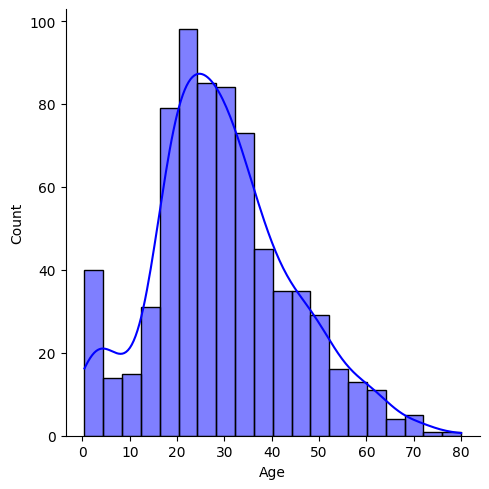

In [10]:
sns.displot(data = train_data['Age'] , kde = True , color = 'Blue')


In [11]:
# Set values in the Age column that are below 1 and above 0 to 1
# Fill nan values with the median of age column and ceil it
train_data['Age'] = train_data['Age'].clip(lower=1)
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Age'] = train_data['Age'].astype(int)

test_data['Age'] = test_data['Age'].clip(lower=1)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Age'] = test_data['Age'].astype(int)


In [12]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [13]:
list(train_data["Embarked"].unique())

['S', 'C', 'Q', nan]

In [14]:
# Fill nan values with the mode of embarked column
mode_ = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(mode_)
test_data['Embarked'] = test_data['Embarked'].fillna(mode_)

In [15]:
print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
print(train_data.isnull().sum() , "\n")
print(test_data.isnull().sum())


--------------------   Missing Values   --------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64



* **Now all columns are complete**

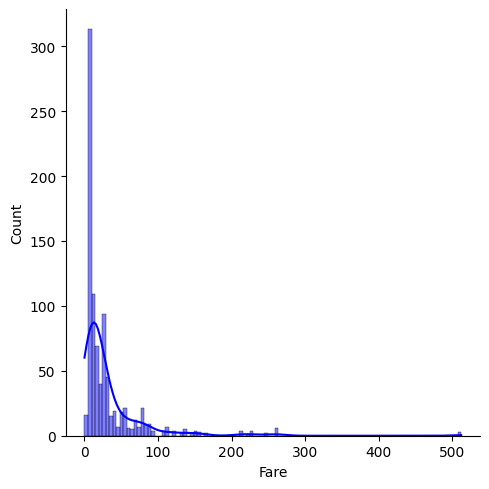

In [16]:
sns.displot(data = train_data['Fare'] , kde = True , color = 'Blue')

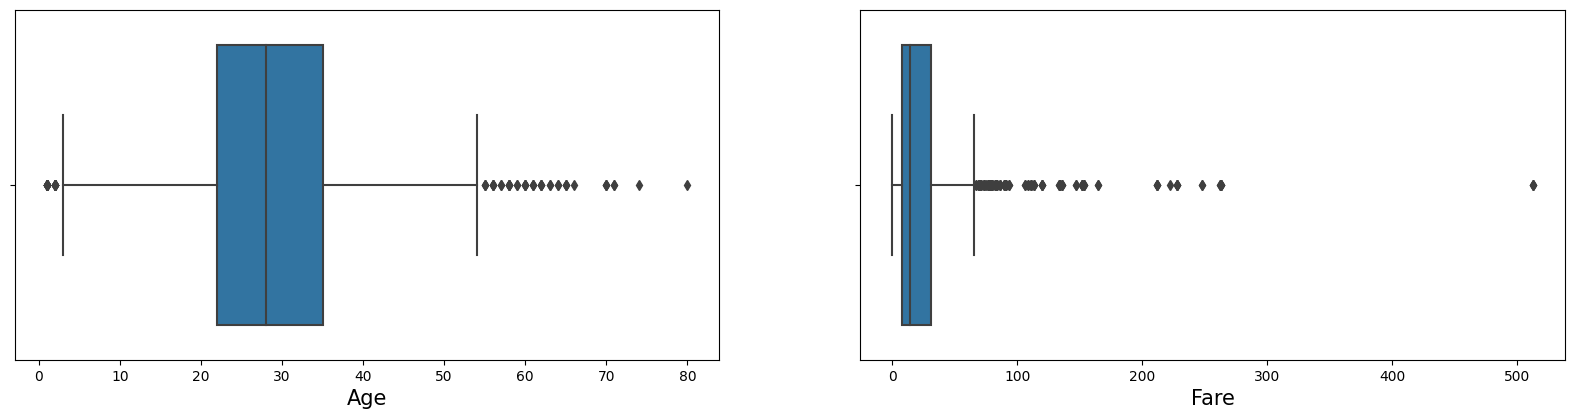

In [17]:
#see the boxplot to sure that there are outliers or no
cols=[ 'Age' , 'Fare']

plt.figure(figsize=(20,10))
for i,col in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=train_data,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

* **There are outliers in (Age & Fare) column but i prefer keep it**

In [18]:
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
train_data['Age_rank'] = pd.cut(train_data['Age'], bins=bins, labels=labels)
test_data["Age_rank"] = pd.cut(test_data['Age'], bins=bins, labels = labels)

In [19]:
train_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
train_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [21]:
# Extract titles from names
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch'] + 1

In [22]:
#first we will drop cabin column cause it has many missing values and PassengerId column
train_data.drop(labels = ['Cabin' , 'Name' , 'Ticket' , 'SibSp' , 'Parch'] , axis = 1 , inplace = True  )
test_data.drop(labels = ['Cabin' , 'Name' , 'Ticket' ,'SibSp' , 'Parch'] , axis = 1 , inplace = True  )

In [23]:
#family_sizes = {
   #0: 0,
    #1: 1,
    #2: 2,
    #3: 3,
    #4: 4,
    #5: 5,
    # assume any family size greater than 5 is still categorized as 5
#}

#train_data["Family_size"] = train_data["Family"].map(family_sizes)
#test_data["Family_size"] = test_data["Family"].map(family_sizes)

In [24]:
train_data["Family_size"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

In [25]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_rank,Family_size
0,1,0,3,male,22,7.2500,S,Mr,Young Adult,2
1,2,1,1,female,38,71.2833,C,Mrs,Adult,2
2,3,1,3,female,26,7.9250,S,Miss,Young Adult,1
3,4,1,1,female,35,53.1000,S,Mrs,Adult,2
4,5,0,3,male,35,8.0500,S,Mr,Adult,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,13.0000,S,Other,Young Adult,1
887,888,1,1,female,19,30.0000,S,Miss,Young Adult,1
888,889,0,3,female,28,23.4500,S,Miss,Young Adult,4
889,890,1,1,male,26,30.0000,C,Mr,Young Adult,1


# **EDA**

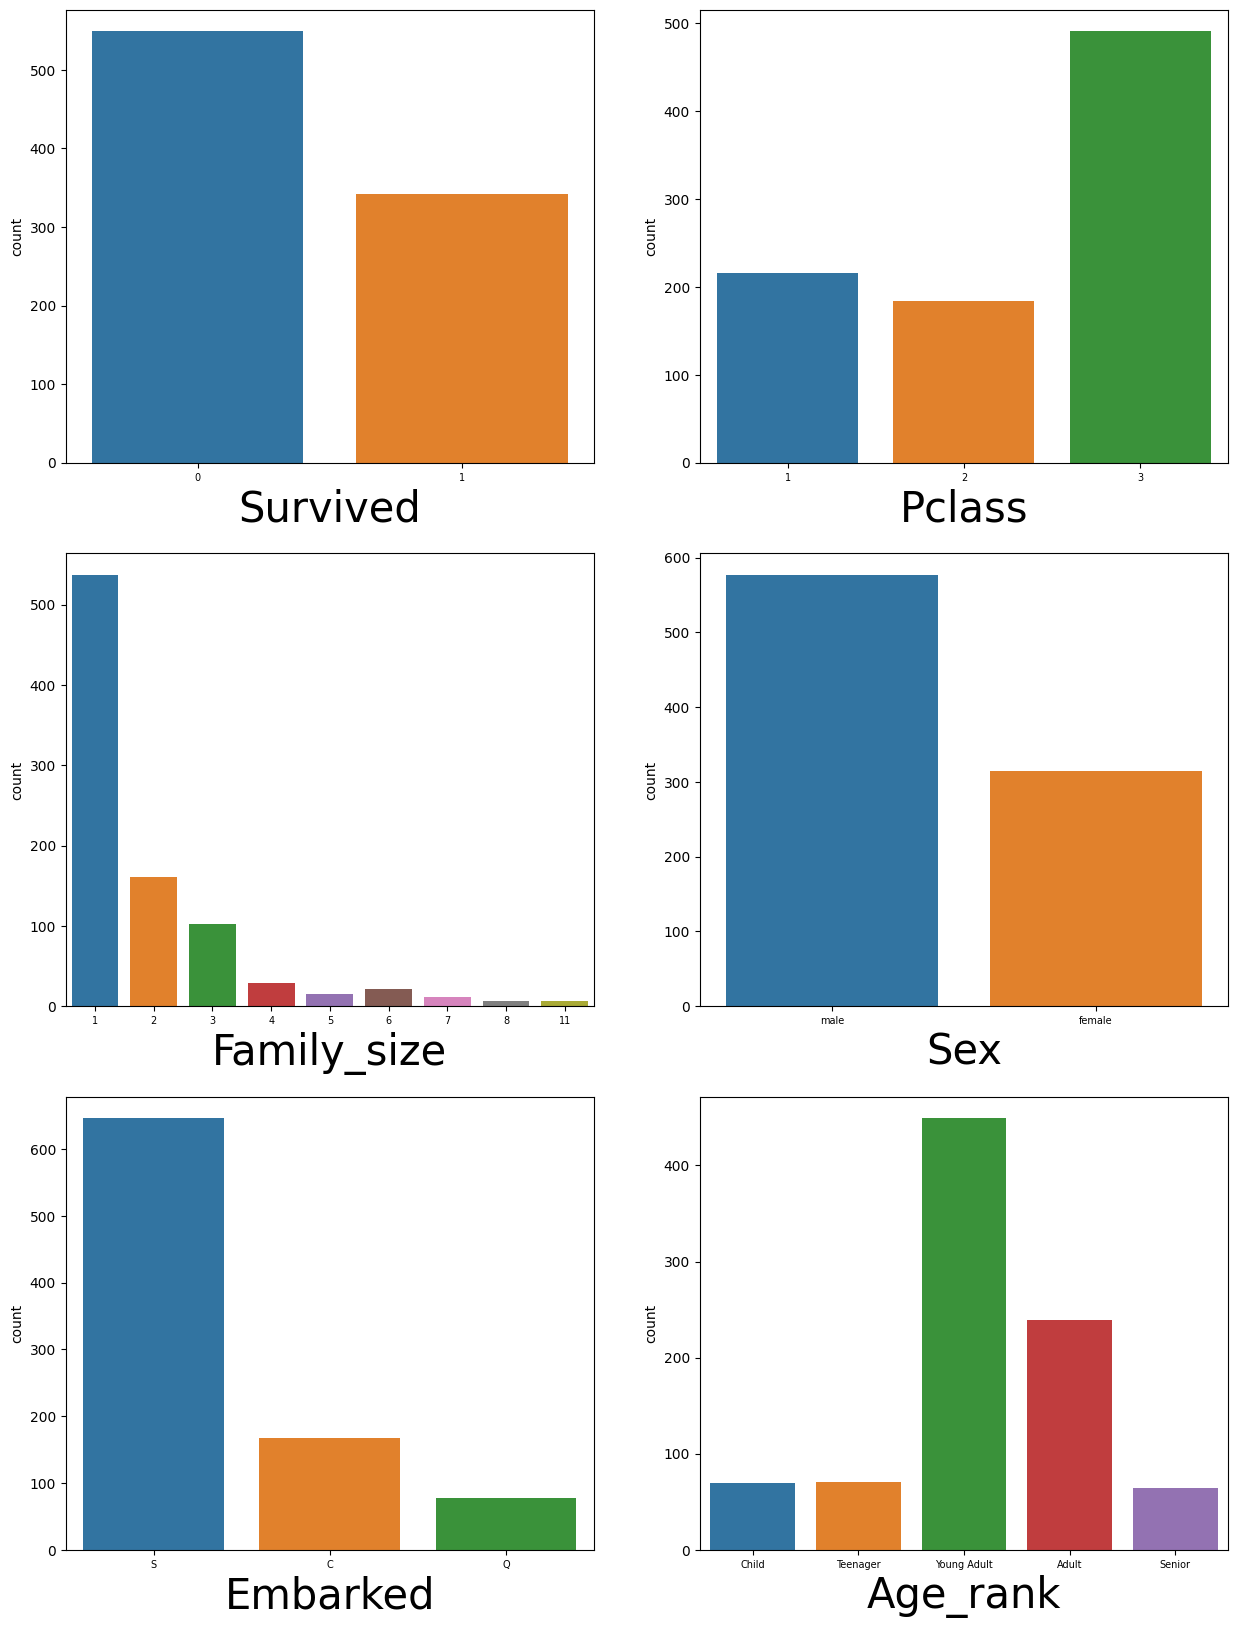

In [26]:
#see our data countplot plot distribution
cols=['Survived' , 'Pclass' , 'Family_size' , 'Sex' , 'Embarked' , 'Age_rank' ]
plt.figure(figsize=(15,20))
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    sns.countplot(data=train_data,x=col )
    plt.xlabel(col, fontsize=30)
    plt.xticks(fontsize=7 )

> **What is the survival state according to title?**

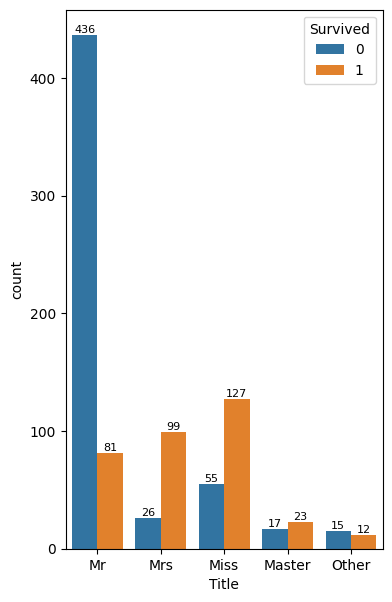

In [27]:
plt.figure(figsize=(9,7))
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Title')
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)

* **The most suvived people whose title is "Miss and Mrs"**
* **The most died whose title "Mr"**

> ****What is the ratio of male to female?****

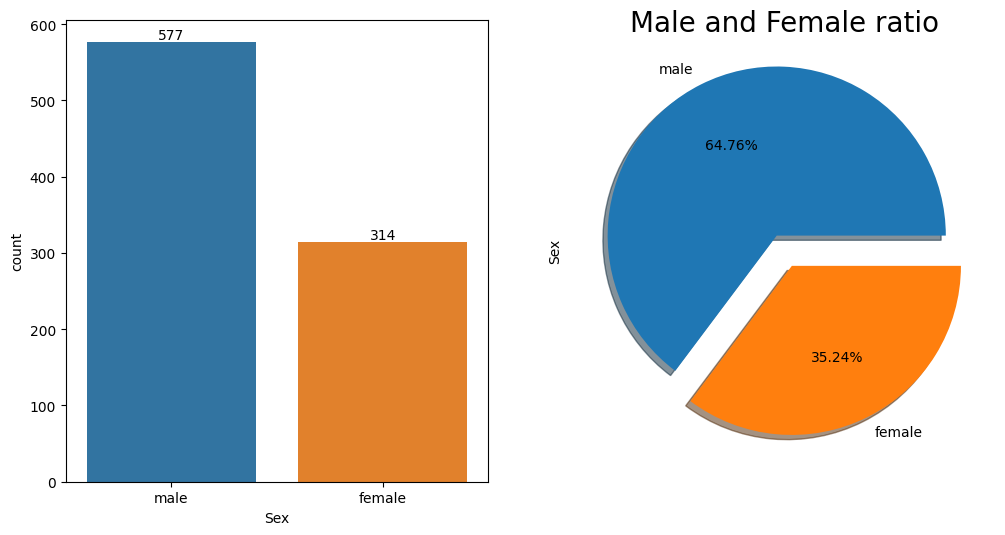

In [28]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data = train_data)
ax.bar_label(ax.containers[0])
ax =plt.subplot(1,2,2)
ax=train_data['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 40,color='Black',font='Lucida Calligraphy');

plt.title("Male and Female ratio", fontsize=20)
plt.show()


> **What is the most common age among male and female passengers?**

<Figure size 2000x1500 with 0 Axes>

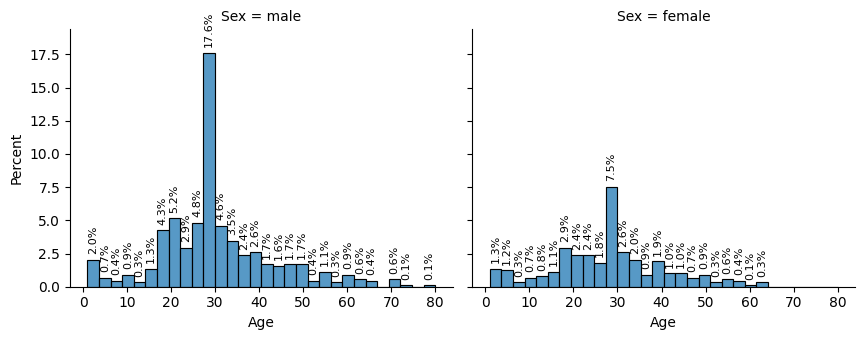

In [29]:
plt.figure(figsize=(20,15))
fg = sns.displot(data=train_data, x='Age', stat='percent', col='Sex', height=3.5, aspect=1.25)

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=4)
    
    ax.margins(y=0.1)

plt.show()

* **(30) is the most common age**

>  ****How does the survival differ by age?****

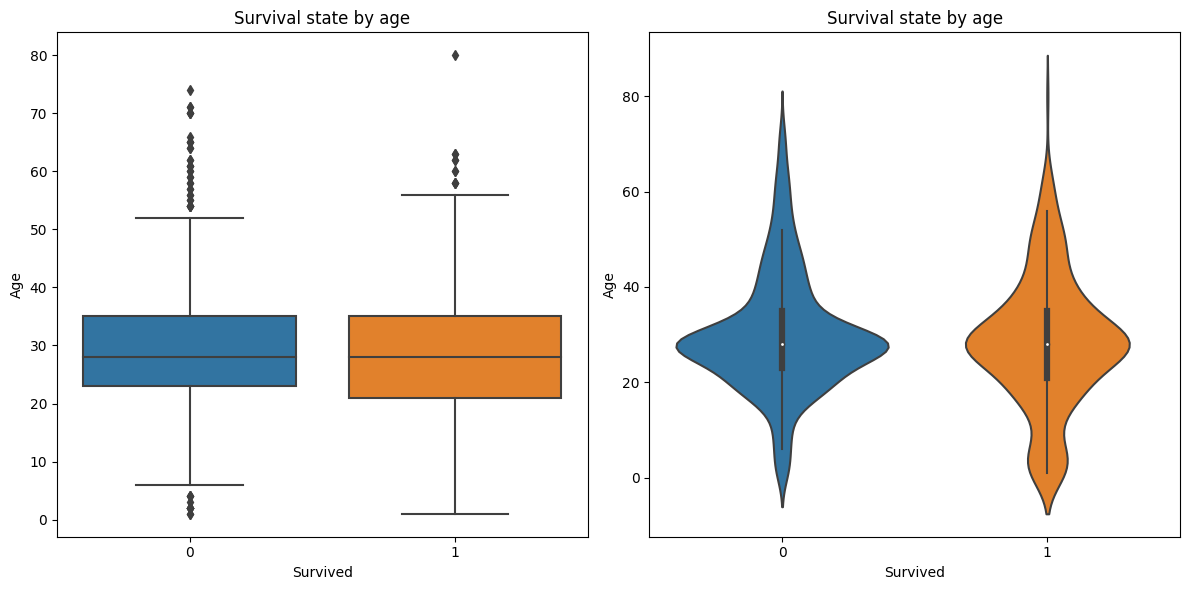

In [30]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1 , 2 , 1)
sns.boxplot(data = train_data , x = 'Survived' , y = 'Age')
plt.title('Survival state by age')


plt.subplot(1 , 2 , 2)
sns.violinplot(data = train_data , x = 'Survived' , y = 'Age' )
plt.title('Survival state by age')

plt.tight_layout()
plt.show()

* **The most age of survived people almost 30**

> ****What is the survival state per fare?****

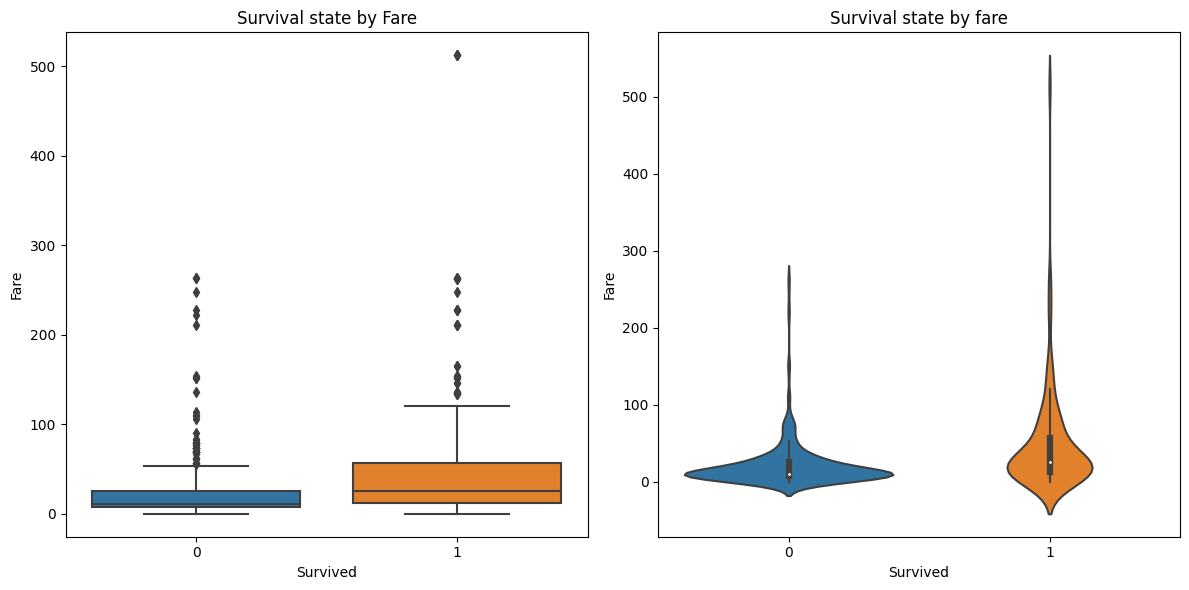

In [31]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1 , 2 , 1)
sns.boxplot(data = train_data , x = 'Survived' , y = 'Fare')
plt.title('Survival state by Fare')


plt.subplot(1 , 2 , 2)
sns.violinplot(data = train_data , x = 'Survived' , y = 'Fare' )
plt.title('Survival state by fare')

plt.tight_layout()
plt.show()

* **Most survival people whose fare between 0 and 5.**

> ****How does the survival differ by gender?****

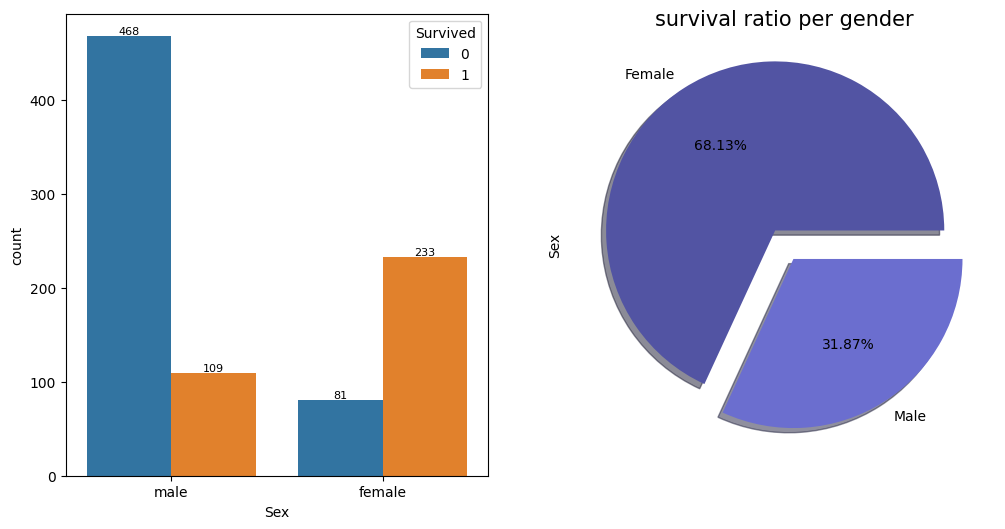

In [32]:
# see countplot distribution between Survived and Sex 
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Sex')
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)

    
ax =plt.subplot(1,2,2)
cmap = plt.get_cmap("tab20b")
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
survived = train_data[train_data['Survived'] == 1]
ax=survived['Sex'].value_counts().plot.pie(labels = ['Female','Male'],explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True , colors = inner_colors);
ax.set_title(label = "survival ratio per gender", fontsize =15,color='Black');


* **Women ratio is greater than men**

> ****What is the relation between Survival and class?****

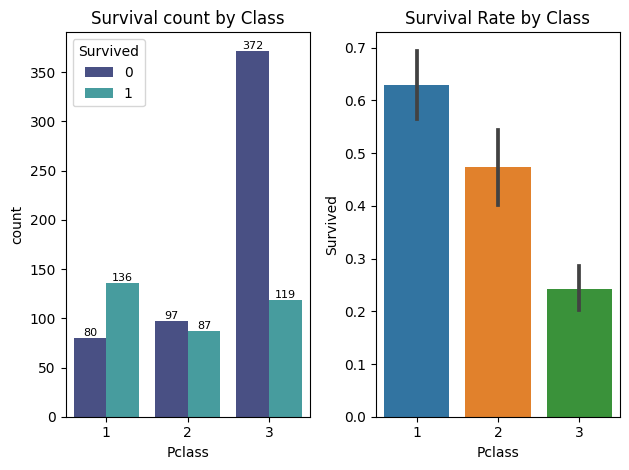

In [33]:
#see barplot distribution between Survived Pclass
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Pclass' ,palette = "mako")
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)
plt.title('Survival count by Class')

plt.subplot(1, 2, 2)
sns.barplot(data  = train_data , y = 'Survived' , x = 'Pclass')
plt.title('Survival Rate by Class')
plt.tight_layout()
plt.show()

* **Passengers in class 1 most likely to survive than (2 & 3)**


In [34]:
survived['Embarked'].value_counts()

S    219
C     93
Q     30
Name: Embarked, dtype: int64

> **What is ther ratio of survived people according to Embark?**

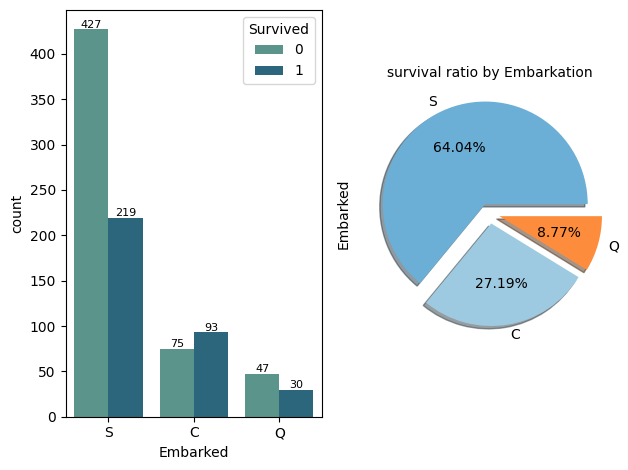

In [35]:
#see barplot distribution between Survived and Embarked
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Embarked' ,palette = "crest")
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)

    
bx =plt.subplot(1,2,2)
cmap = plt.get_cmap("tab20c")
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
survived = train_data[train_data['Survived'] == 1]
bx=survived['Embarked'].value_counts().plot.pie(labels = ['S' , 'C' , 'Q'] ,explode=[0.1, 0.1 , 0.1],autopct='%1.2f%%',shadow=True  , colors = inner_colors);
bx.set_title(label = "survival ratio by Embarkation", fontsize =60,color='Black',font='Lucida Calligraphy');
plt.tight_layout()
plt.show()

* **The most survived people form S embark is greater than who dead**
* **But the most likely people to survive who was in C embark**

> ****what is the correlation between features?****

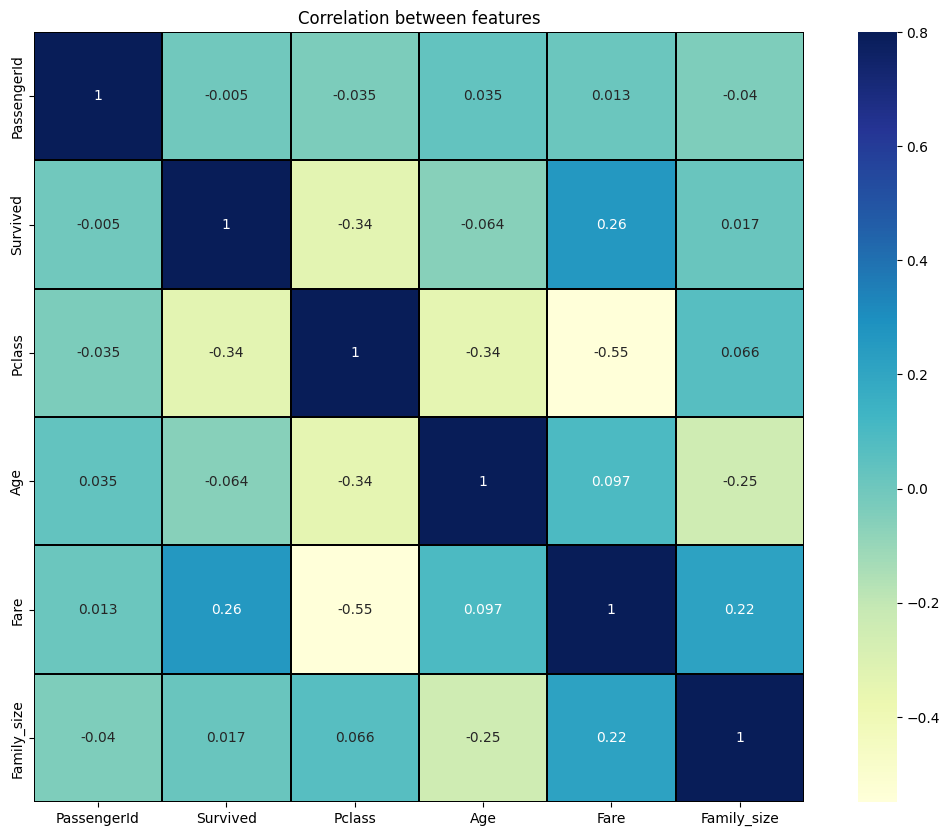

In [36]:
corr=train_data.corr()#["Survived"]
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

> ****What is the relation between Sibling and Parch?****

Text(0.5, 1.0, 'Survival count by Sibling')

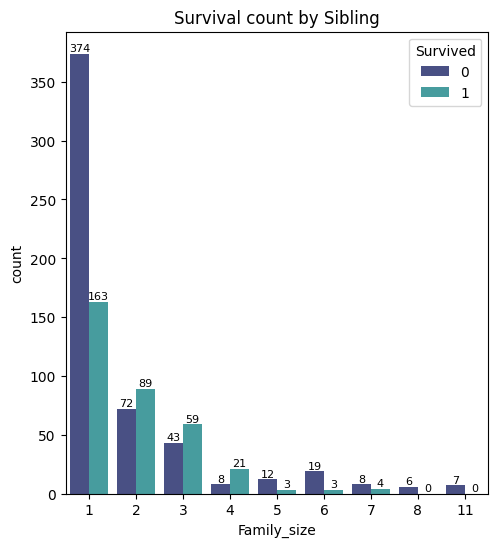

In [37]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Family_size' ,palette = "mako")
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)
plt.title('Survival count by Sibling')

> **How many survived people per each age rank?**

In [38]:
train_data["Age_rank"].value_counts()

Young Adult    449
Adult          239
Teenager        70
Child           69
Senior          64
Name: Age_rank, dtype: int64

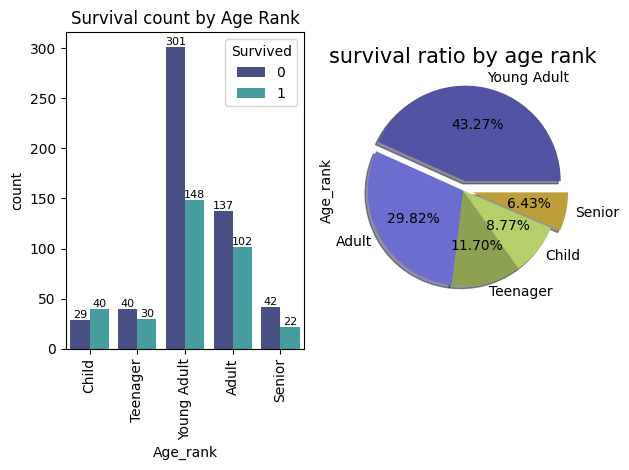

In [39]:
ax = plt.subplot(1,2,1)
fg = sns.countplot(data=train_data, hue='Survived', x='Age_rank' ,palette = "mako")
for p in fg.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, '{:.0f}'.format(height), ha="center", fontsize=8)
plt.xticks(rotation = 90)    
plt.title('Survival count by Age Rank')

bx =plt.subplot(1,2,2)
cmap = plt.get_cmap("tab20b")
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
survived = train_data[train_data['Survived'] == 1]
bx=survived['Age_rank'].value_counts().plot.pie(labels = ['Young Adult' , 'Adult' , 'Teenager' , 'Child' , 'Senior'] ,explode=[0.1,0,0,0,0.1],autopct='%1.2f%%',shadow=True  , colors = inner_colors);
bx.set_title(label = "survival ratio by age rank", fontsize =15,color='Black');

plt.tight_layout()
plt.show()

* **The highest number of survivors were child**
* **The highest number of dead were young adult**

In [40]:
#low_age , high_age = df["Age"].quantile([.1 ,  .8])
#mask_age = df["Age"].between(low_age , high_age)

#low_fare , high_fare = df["Fare"].quantile([.1 , .58])
#mask_fare = df["Fare"].between(low_fare , high_fare)
#df = df[mask_age & mask_fare]

# ****Feature Engineering****

In [41]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_rank,Family_size
0,1,0,3,male,22,7.2500,S,Mr,Young Adult,2
1,2,1,1,female,38,71.2833,C,Mrs,Adult,2
2,3,1,3,female,26,7.9250,S,Miss,Young Adult,1
3,4,1,1,female,35,53.1000,S,Mrs,Adult,2
4,5,0,3,male,35,8.0500,S,Mr,Adult,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,13.0000,S,Other,Young Adult,1
887,888,1,1,female,19,30.0000,S,Miss,Young Adult,1
888,889,0,3,female,28,23.4500,S,Miss,Young Adult,4
889,890,1,1,male,26,30.0000,C,Mr,Young Adult,1


In [42]:
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train_data['Title'] = train_data['Title'].map({'Mr': 0, 'Miss': 1,'Mrs': 2,'Master' : 3,'Other' : 4})
train_data['Age_rank'] = train_data['Age_rank'].map({'Young Adult': 0, 'Adult': 1,'Teenager': 2,'Child' : 3,'Senior' : 4})


test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Title'] = test_data['Title'].map({'Mr': 0, 'Miss': 1,'Mrs': 2,'Master' : 3,'Other' : 4})
test_data['Age_rank'] = test_data['Age_rank'].map({'Young Adult': 0, 'Adult': 1,'Teenager': 2,'Child' : 3,'Senior' : 4})


In [43]:
# Create a new feature indicating whether the passenger was travelling alone or with family
train_data['IsAlone'] = train_data['Family_size'].apply(lambda x: 1 if x == 1 else 0)
test_data['IsAlone'] = test_data['Family_size'].apply(lambda x: 1 if x == 1 else 0)

In [44]:
Passenger_Id  = test_data["PassengerId"]

In [45]:
test_data.drop(['PassengerId'], axis=1 , inplace=True)

# **Model Building**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# For Evaluation 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
from time import time


In [47]:
X = train_data[['Pclass', 'Sex', 'Age','Fare', 'Embarked','Title' , 'Age_rank', 'Family_size' , 'IsAlone']]
y = train_data["Survived"]

In [48]:
# Split the data into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [49]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#num_cols = ["Fare","Family_size"]
#X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
#X_val[num_cols] = scaler.transform(X_val[num_cols])
#test_data[num_cols] = scaler.transform(test_data[num_cols])

In [50]:
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['newton-cg', 'lbfgs', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 500, 1000],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Support Vector Machine': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2, 3, 4],
            'gamma': ['scale', 'auto']
        }
    },
        'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 500, 1000],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'subsample': [0.5, 0.75, 1.0],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'MLP Classifier': {
        'model': MLPClassifier(random_state=42),
        'params': {
            'hidden_layer_sizes': [(10,), (50,), (100,)],
            'activation': ['relu', 'logistic']
        }
    }
 }

In [51]:
# Train and evaluate each model using randomized search
scores = []
for name, mp in model_params.items():
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, random_state=42, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': name,
        'best score': clf.best_score_,
        'best params': clf.best_params_
    })

# Display the results in a table
df = pd.DataFrame(scores, columns=['model', 'best score', 'best params'])
df.sort_values(by=['best score'], ascending=False, inplace=True)
df

,model,best score,best params
4,Gradient Boosting,0.842726,"{'subsample': 0.75, 'n_estimators': 1000, 'min..."
2,Random Forest,0.840892,"{'n_estimators': 500, 'min_samples_split': 5, ..."
0,Logistic Regression,0.827773,"{'solver': 'lbfgs', 'C': 0.1}"
1,Decision Tree,0.818427,"{'min_samples_split': 2, 'min_samples_leaf': 1..."
5,MLP Classifier,0.816558,"{'hidden_layer_sizes': (50,), 'activation': 'l..."
3,Support Vector Machine,0.810968,"{'kernel': 'linear', 'gamma': 'auto', 'degree'..."


In [52]:
# Define a list of models to train
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42))
    
]

# Train and evaluate each model
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the validation set
    y_val_pred = model.predict(X_val)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')

    
    # Predict the test set and report the final accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{name}: Test Accuracy = {test_accuracy:.2f}\n')
    
    #precision = precision_score(y_test , y_val_pred)
    #recall = recall_score(y_test , y_val_pred)
    #f1 = f1_score(y_test,y_val_pred) 
    #print('precision: {0:.2f}, recall: {1:.2f}, F1: {2:.2f},'.format(precision, recall, f1))
    print(classification_report(y_val, y_val_pred))

Random Forest: Accuracy = 0.78
Random Forest: Test Accuracy = 0.82

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       113
           1       0.69      0.69      0.69        65

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178

GradientBoostingClassifier: Accuracy = 0.84
GradientBoostingClassifier: Test Accuracy = 0.81

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       113
           1       0.82      0.71      0.76        65

    accuracy                           0.84       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.84      0.84      0.83       178

LogisticRegression: Accuracy = 0.78
LogisticRegression: Test Accuracy = 0.82

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       1

****-The best model is GradientBoosting with**** : 

Accuracy = 0.84  , Test Accuracy = 0.81 , precision = 0.84 , recall = 0.91 , f1-score = 0.88

****-So will submit it****

In [53]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_rank,Family_size,IsAlone
0,1,0,3,1,22,7.2500,0,0,0,2,0
1,2,1,1,0,38,71.2833,1,2,1,2,0
2,3,1,3,0,26,7.9250,0,1,0,1,1
3,4,1,1,0,35,53.1000,0,2,1,2,0
4,5,0,3,1,35,8.0500,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,13.0000,0,4,0,1,1
887,888,1,1,0,19,30.0000,0,1,0,1,1
888,889,0,3,0,28,23.4500,0,1,0,4,0
889,890,1,1,1,26,30.0000,1,0,0,1,1


In [54]:
test_data

,Pclass,Sex,Age,Fare,Embarked,Title,Age_rank,Family_size,IsAlone
0,3,1,34,7.8292,2,0,1,1,1
1,3,0,47,7.0000,0,2,1,2,0
2,2,1,62,9.6875,2,0,4,1,1
3,3,1,27,8.6625,0,0,0,1,1
4,3,0,22,12.2875,0,2,0,3,0
...,...,...,...,...,...,...,...,...,...
413,3,1,27,8.0500,0,0,0,1,1
414,1,0,39,108.9000,1,4,1,1,1
415,3,1,38,7.2500,0,0,1,1,1
416,3,1,27,8.0500,0,0,0,1,1


In [55]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(test_data)

In [56]:
 #Create submission file
submission = pd.DataFrame({
    "PassengerId": Passenger_Id,
    "Survived": y_pred_gb
    })
submission.to_csv("submission.csv", index=False)